In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install xgboost
import xgboost as xgb

In [3]:
df=pd.read_csv("Salary1")


# Data Preprocessing


In [4]:
#checking the shape of the data
df.shape

(6700, 9)

In [5]:
#cecking for null/missing values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 2
Country                0
Race                   0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
#cecking for null/missing values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [8]:
#dropping column
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [9]:
df.dtypes

Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [10]:
# unique values in each column
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64


# Grouping Job Titles 

In [11]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [12]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower()
    if 'software' in job_title or 'developer' in job_title:
         return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
         return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
         return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
         return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
         return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
         return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
         return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
         return 'Financial/Accountant'
    elif 'project manager' in job_title:
         return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
         return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
         return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
         return 'Customer Service/Receptionist'
    else:
         return 'Other'
df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [13]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

# Grouping Education Level


In [14]:

def group_education(Educaton):
 
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'
df['Education Level'] = df['Education Level'].apply(group_education) 

# Descriptive Statistics

In [15]:
#descriptive statistics
df.describe()


,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [16]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


In [17]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


In [18]:
df['Salary'] = pd.to_numeric(df['Salary'])


In [19]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


# Exploratory Data Analysis


# Pie chart for Gender

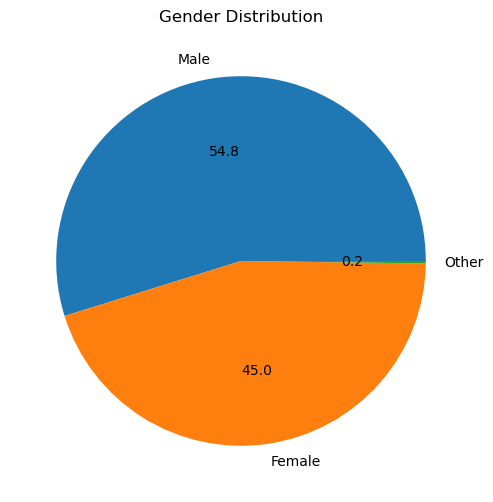

In [20]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(), labels=['Male','Female', 'Other'], autopct='%.1f')
plt.title('Gender Distribution')
plt.show()


# Age Distribution


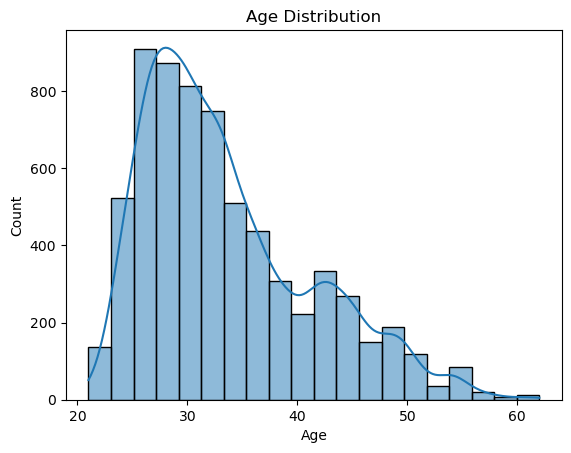

In [21]:
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Education Level


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Masters'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'High School')])

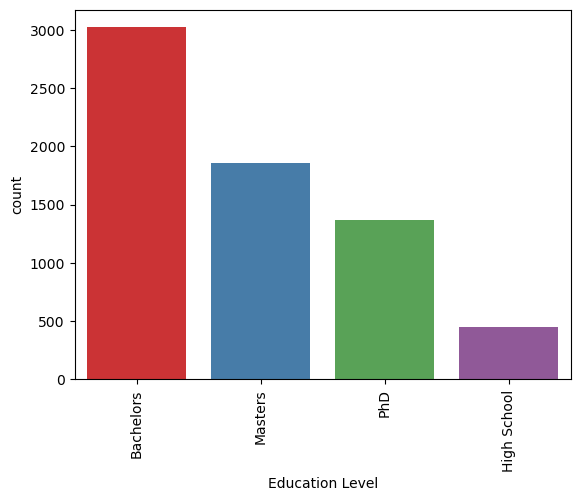

In [22]:
sns.countplot(x = 'Education Level', data = df, palette='Set1')
plt.xticks(rotation=90)

# Job Title


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

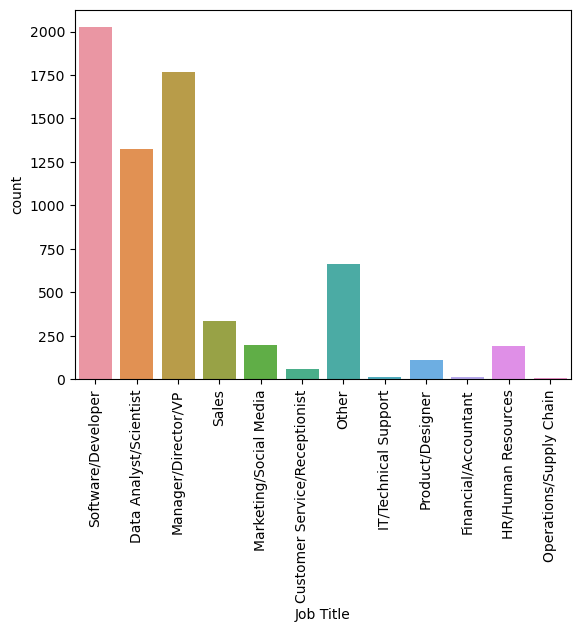

In [23]:
sns.countplot(x='Job Title', data = df)
plt.xticks(rotation=90)

# Years of Experience

<AxesSubplot:xlabel='Years of Experience', ylabel='Count'>

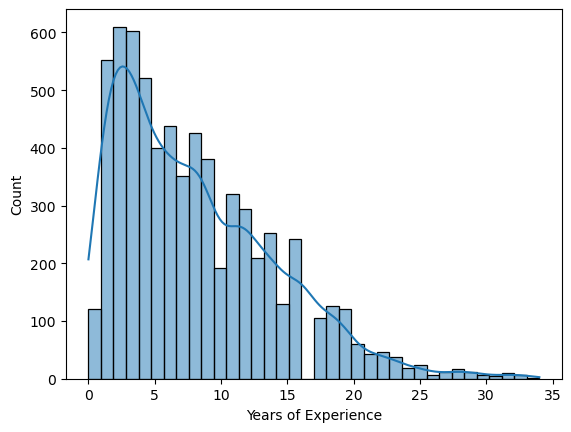

In [24]:
sns.histplot(x = 'Years of Experience', data = df,kde=True)

# Country


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

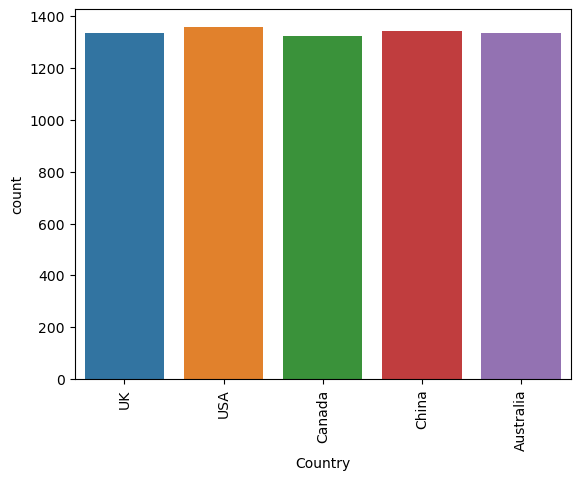

In [25]:
sns.countplot(x='Country', data=df)
plt.xticks(rotation=90)


# Racial Distribution

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

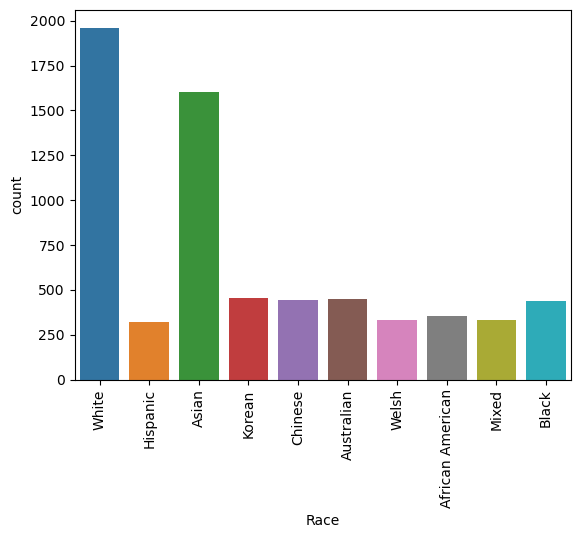

In [26]:
sns.countplot(x='Race', data=df)
plt.xticks(rotation=90)

# Age and Salary


Text(0.5, 1.0, 'Age vs Salary')

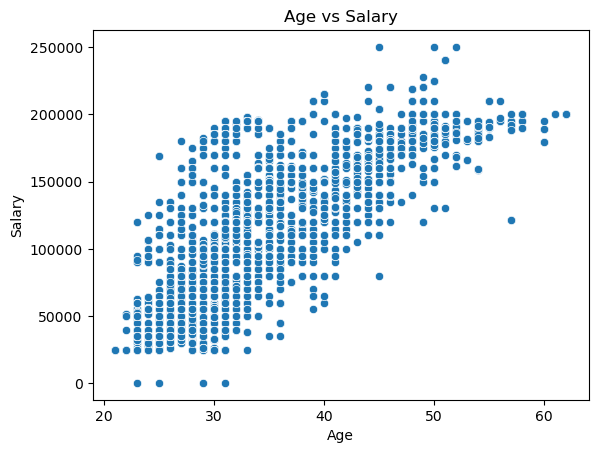

In [27]:
sns.scatterplot(x = 'Age', y='Salary', data=df)
plt.title('Age vs Salary')

# Gender and Salary


Text(0.5, 1.0, 'Gender vs Salary')

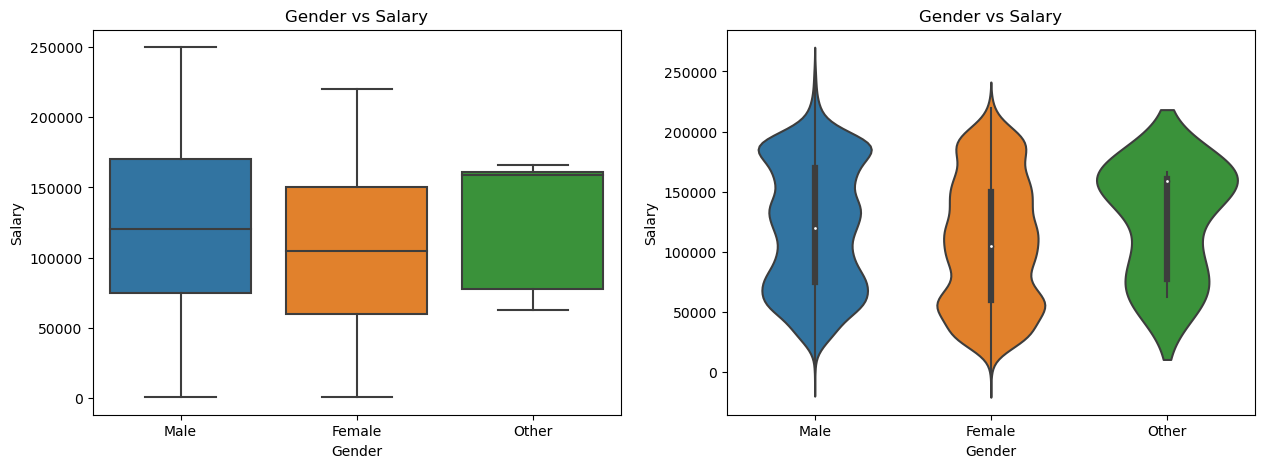

In [28]:

fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.boxplot(x = 'Gender', y='Salary', data = df, ax =ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = df, ax =ax[1]).set_title('Gender vs Salary')

# Education Level and Salary


Text(0.5, 1.0, 'Education Level vs Salary')

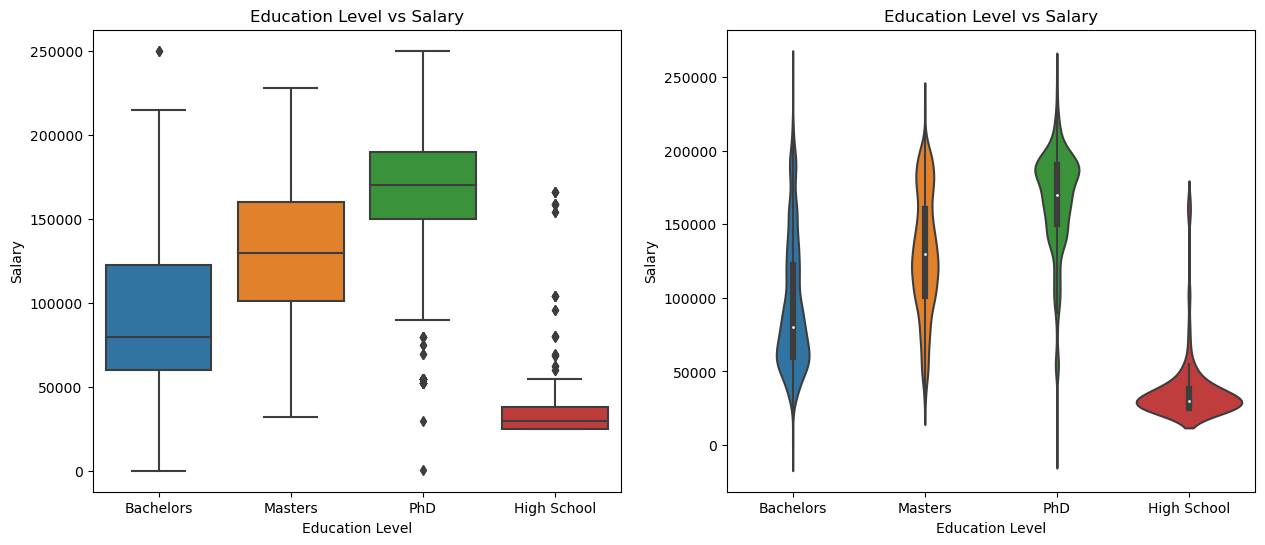

In [29]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[1]).set_title('Education Level vs Salary')


# Job Title and Salary


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

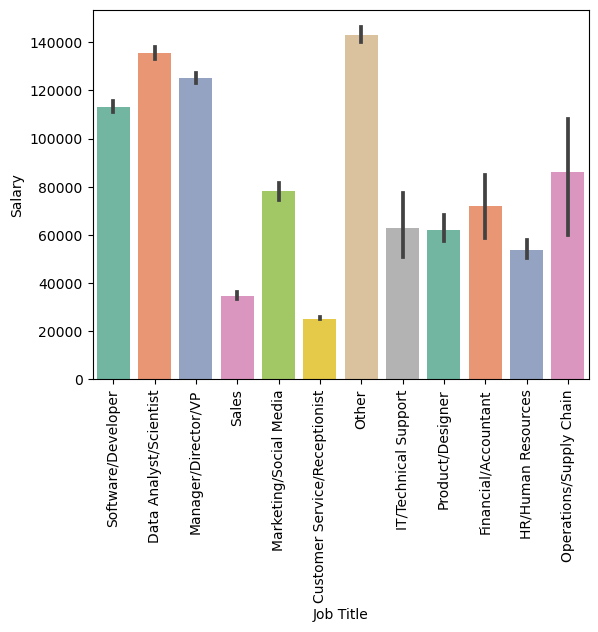

In [30]:
sns.barplot(x = 'Job Title', y = 'Salary', data = df, palette = 'Set2')
plt.xticks(rotation = 90)


# Experience and Salary


Text(0.5, 1.0, 'Years of Experience vs Salary')

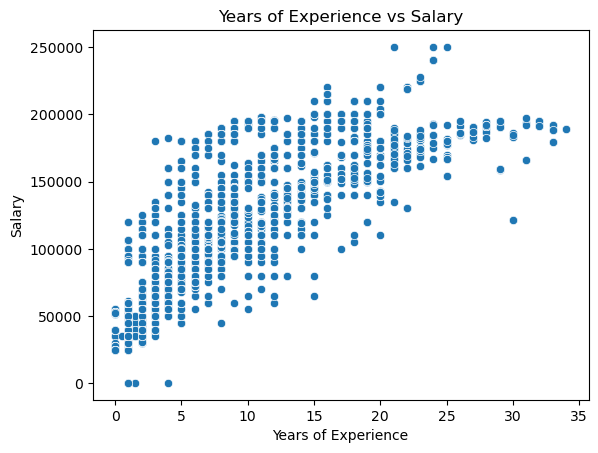

In [31]:
sns.scatterplot(x= 'Years of Experience', y = 'Salary', data = df).set_title('Years of Experience vs Salary')


# Country and Salary


<AxesSubplot:xlabel='Country', ylabel='Salary'>

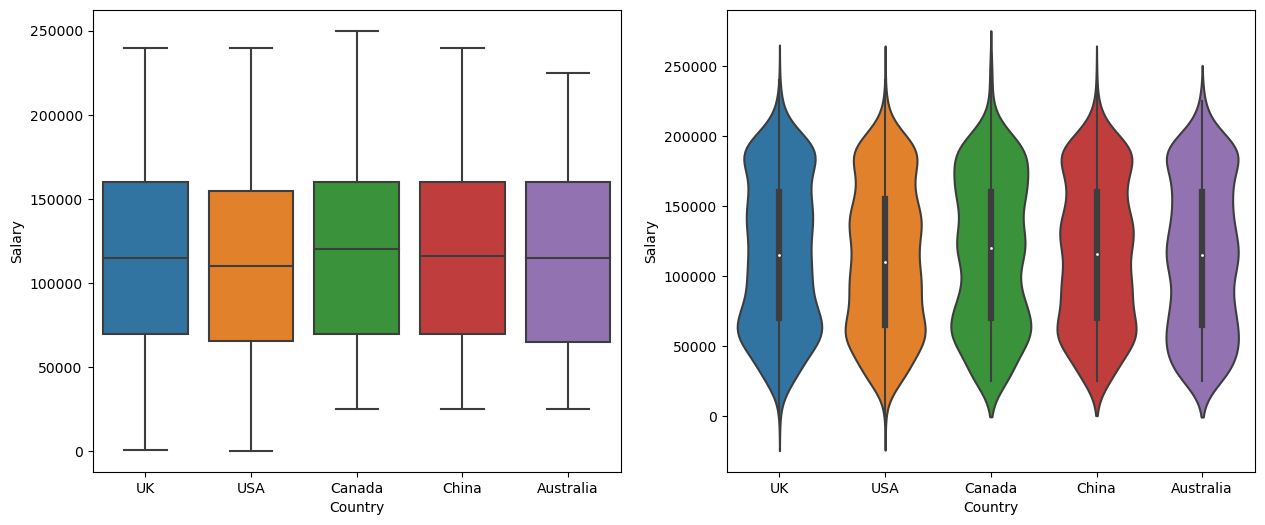

In [32]:

fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Country', y = 'Salary', data = df, ax=ax[0])
sns.violinplot(x = 'Country', y = 'Salary', data = df, ax=ax[1])


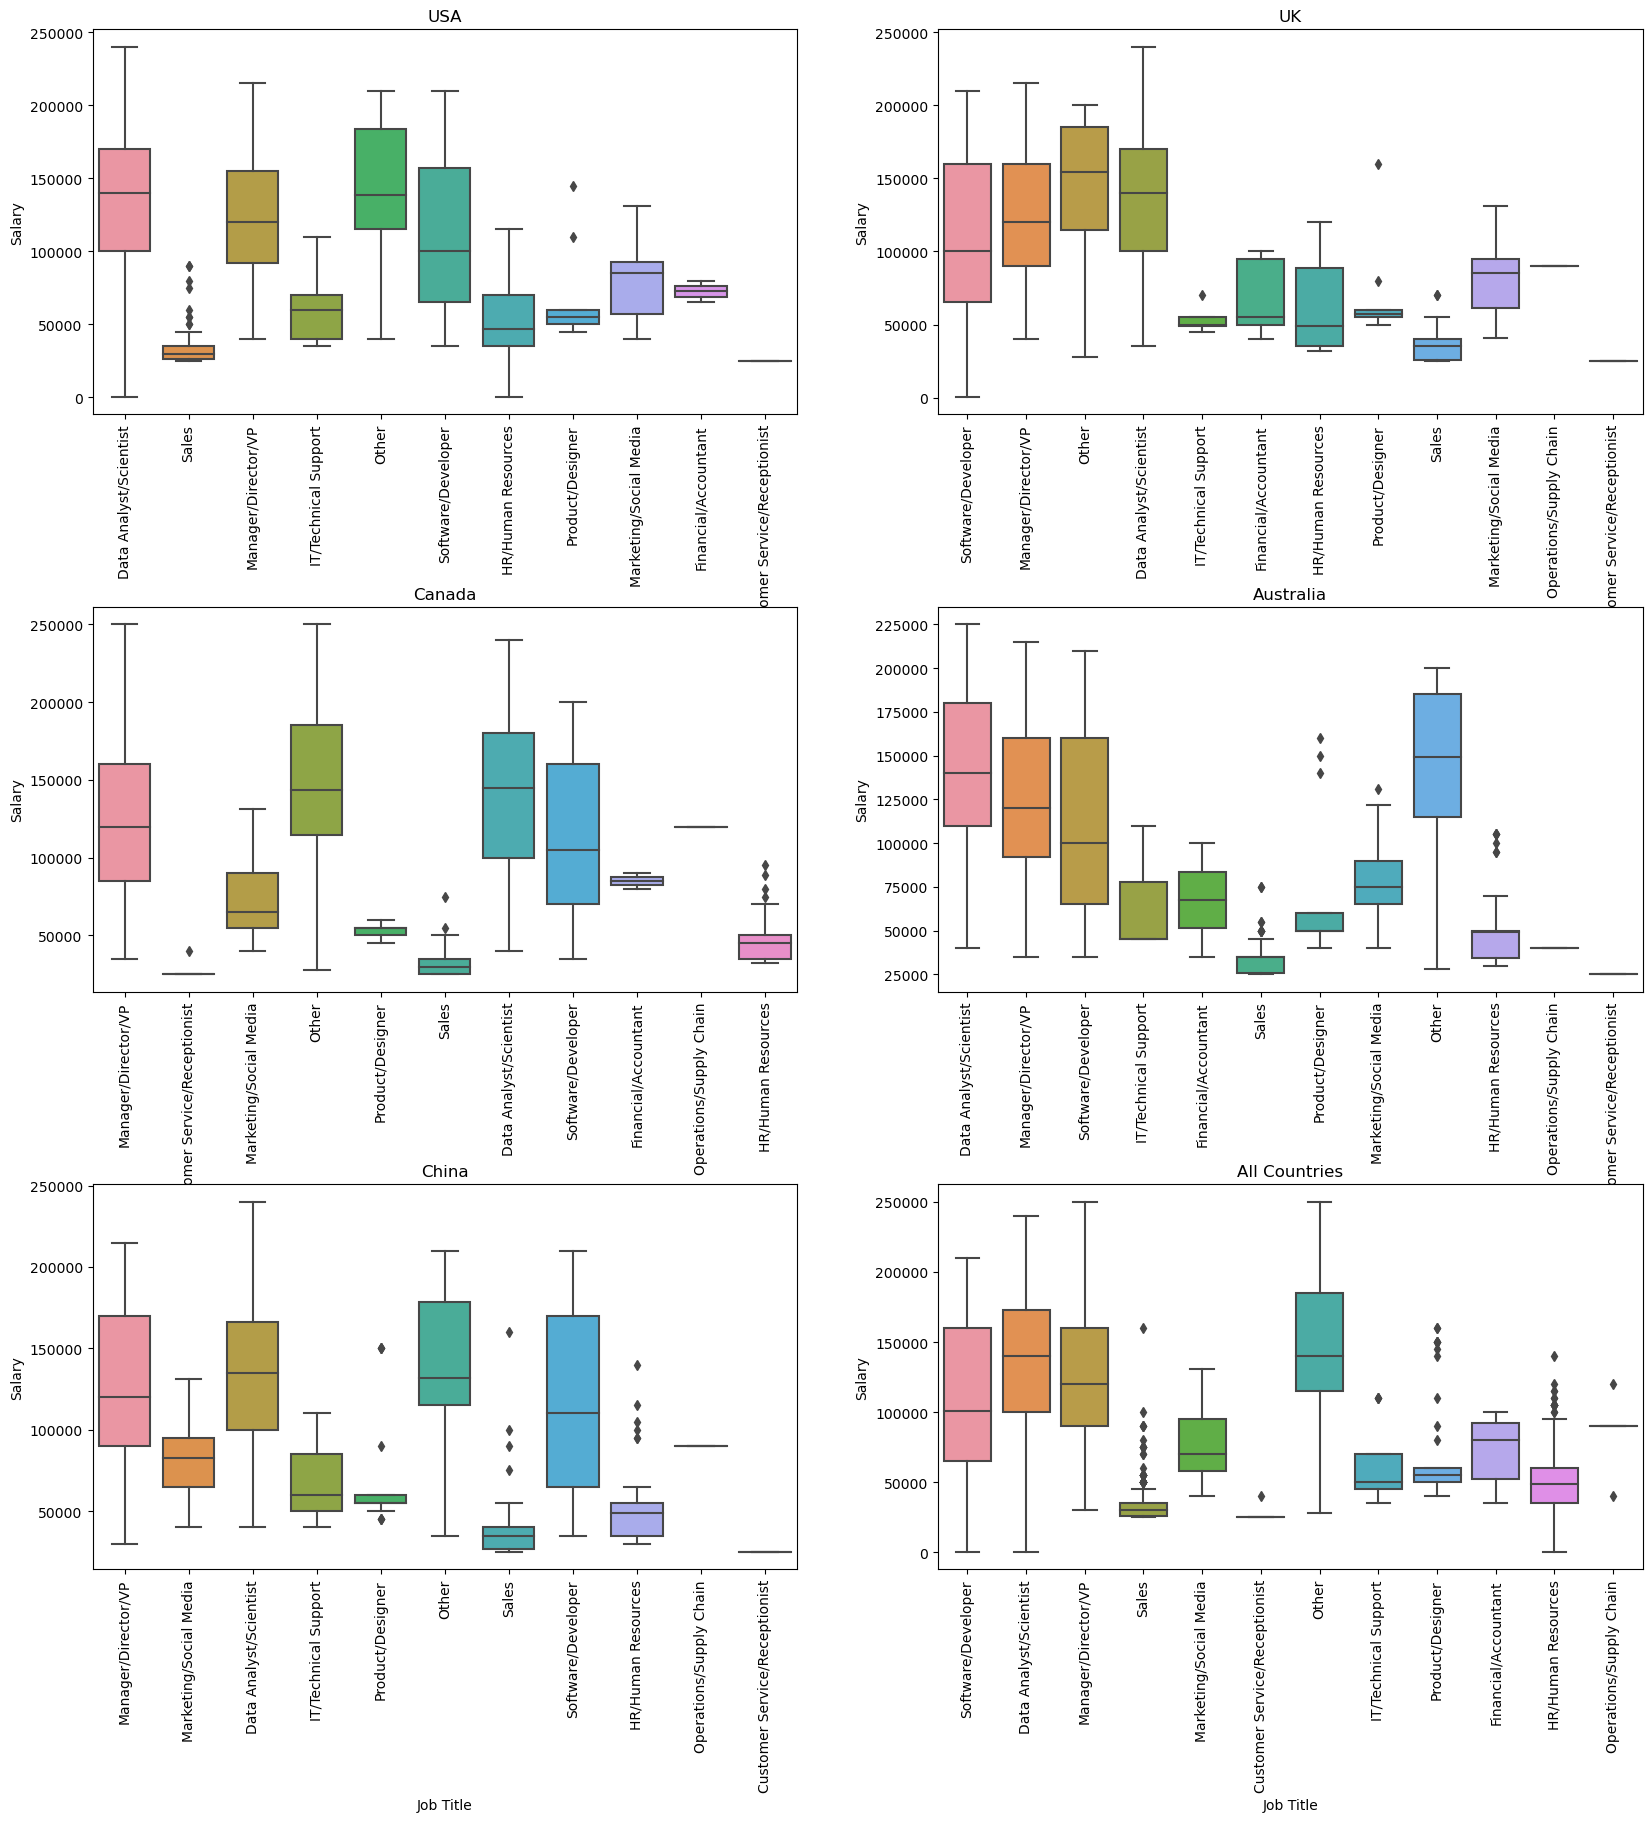

In [33]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)

sns.boxplot(x='Job Title', y='Salary', data=df[df['Country'] == 'USA'], ax=ax[0, 0]).set_title('USA')
ax[0, 0].tick_params(axis='x', rotation=90)

sns.boxplot(x='Job Title', y='Salary', data=df[df['Country'] == 'UK'], ax=ax[0, 1]).set_title('UK')
ax[0, 1].tick_params(axis='x', rotation=90)

sns.boxplot(x='Job Title', y='Salary', data=df[df['Country'] == 'Canada'], ax=ax[1, 0]).set_title('Canada')
ax[1, 0].tick_params(axis='x', rotation=90)

sns.boxplot(x='Job Title', y='Salary', data=df[df['Country'] == 'Australia'], ax=ax[1, 1]).set_title('Australia')
ax[1, 1].tick_params(axis='x', rotation=90)

sns.boxplot(x='Job Title', y='Salary', data=df[df['Country'] == 'China'], ax=ax[2, 0]).set_title('China')
ax[2, 0].tick_params(axis='x', rotation=90)

sns.boxplot(x='Job Title', y='Salary', data=df, ax=ax[2, 1]).set_title('All Countries')
ax[2, 1].tick_params(axis='x', rotation=90)

plt.show()



# Race and Salary


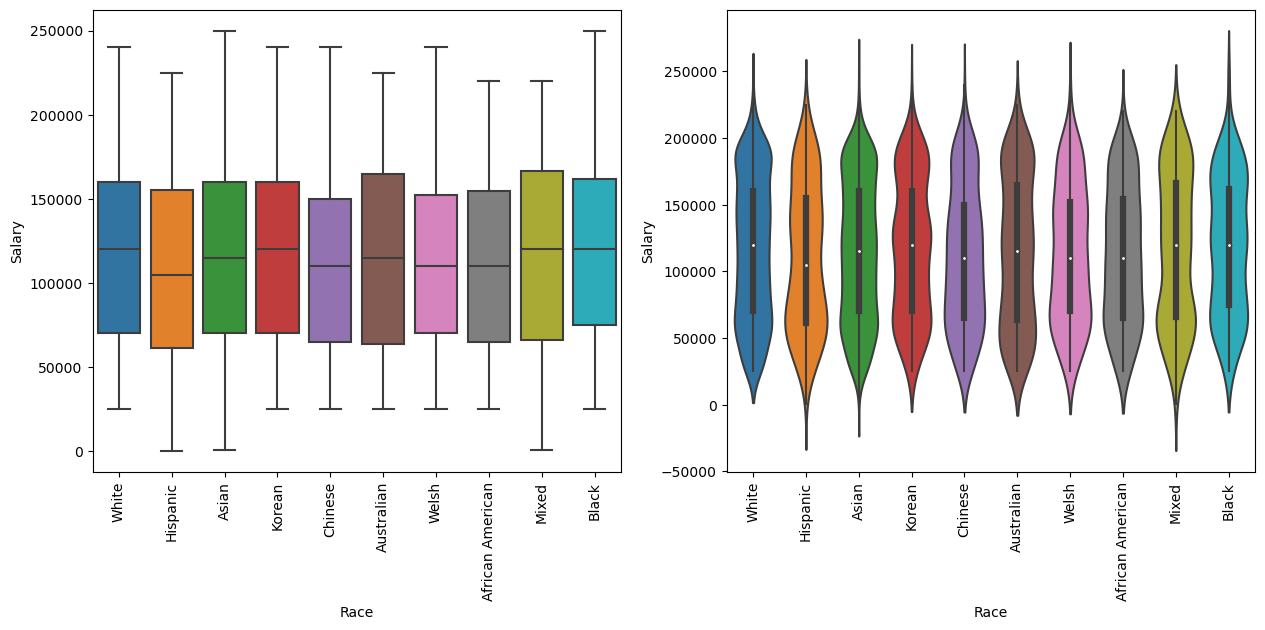

In [34]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Race', y = 'Salary', data = df, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.violinplot(x = 'Race', y ='Salary', data = df, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)


# Data Preprocessing 2


Label encoding to categorical features


In [35]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
 le.fit(df[feature].unique())
 df[feature] = le.transform(df[feature])
 print(feature, df[feature].unique())


Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


# Normalization


In [36]:
#normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [37]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,11,-0.510769,-0.479849,3,9
1,-0.738393,0,2,1,-0.840811,-0.953461,4,5
2,1.493980,1,3,5,1.139440,0.656819,1,9
3,0.312135,0,0,10,-0.180727,-1.048183,4,5
4,2.413192,1,2,5,1.964544,1.604042,4,1


# Coorelation Matrix Heatmap

<AxesSubplot:>

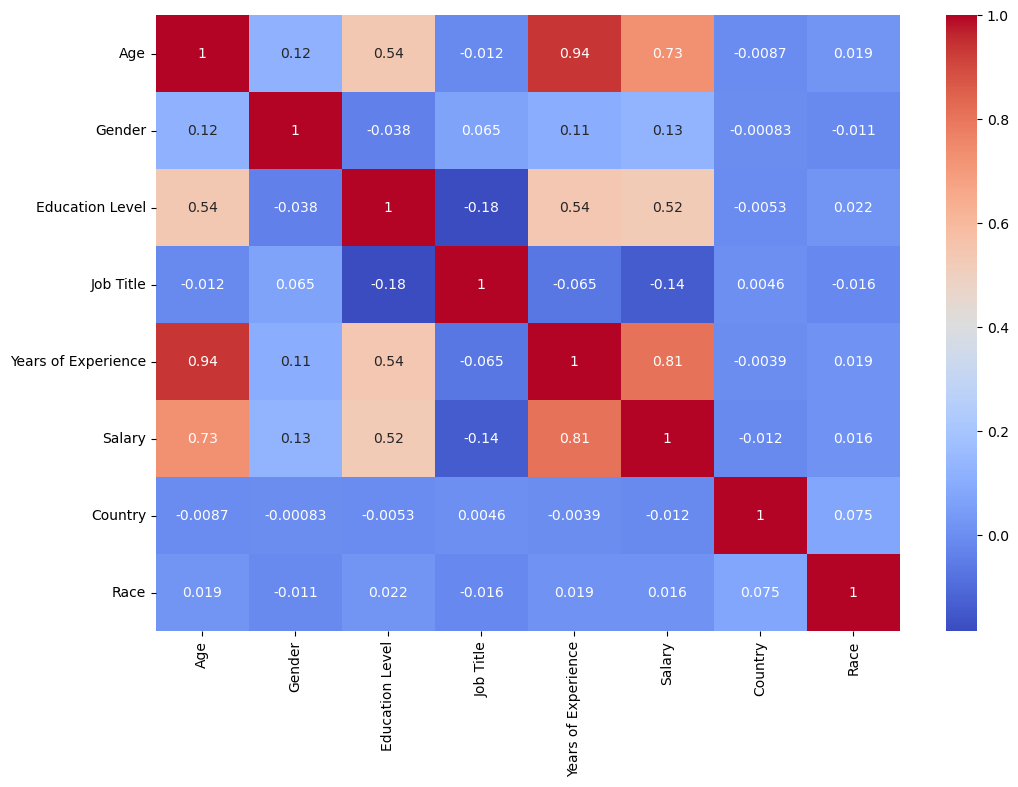

In [38]:
#coorelation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


In this coorelation matrix, there are three major coorealtions.

-> Salary and Age
-> Salary and Years of Experience
-> Years of Experience and Age

The coorelation salary with age and years of experience is already explored in the above plots. The coorelation between the years of experience and age is obvious as the person ages the experience will be more.

# Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df['Salary'], train_size = 0.7, random_state = 42)

# Salary Prediction


# Multiple Linear Regresssion


In [40]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression()

In [63]:
m_pred= regressor.predict(X_test)  

In [64]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, m_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, m_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, m_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, m_pred)))


R2 Score:  0.6753736286375351
Mean Squared Error:  0.3307422017155624
Mean Absolute Error:  0.45675137690204587
RMSE: 0.5751019055050699


# Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
#createing the decision tree gressor object
dtree = DecisionTreeRegressor()


# Hypertuning the model

In [42]:
from sklearn.model_selection import GridSearchCV
#defining the parameters for the grid search
parameters = {'max_depth' :[2,4,6,8,10],
 'min_samples_split' :[2,4,6,8],
 'min_samples_leaf' :[2,4,6,8],
 'max_features' :['auto','sqrt','log2'],
 'random_state' :[0,42]}
#creating the grid search object
grid_search = GridSearchCV(dtree,parameters,cv=5,scoring='neg_mean_squared_error')
#fit the grid search object to the training data
grid_search.fit(X_train,y_train)
#print the best parameters
print(grid_search.best_params_)


{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


##### Building the model on best parameters

In [43]:

dtree = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf= 2, min_samples_split= 8, random_state=42)
dtree

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [44]:
#fitting the training data
dtree.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [45]:
#training accuracy
dtree.score(X_train, y_train)

0.9670581002795477

In [46]:
#predicting the salary of an employee 
d_pred = dtree.predict(X_test)


# Evaluating the Decision Tree Regressor Model
 

In [47]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)


,Actual,Predicted
0,0.656819,0.675152
1,-0.745659,-0.661765
2,-0.290405,-0.439254
3,-1.048183,-1.039572
4,-0.669294,-0.679819
5,1.414598,1.494747
6,-0.820850,-0.729183
7,-1.142906,-1.123961
8,1.509320,1.537737
9,0.277930,0.215361


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predicted', ylabel='Density'>

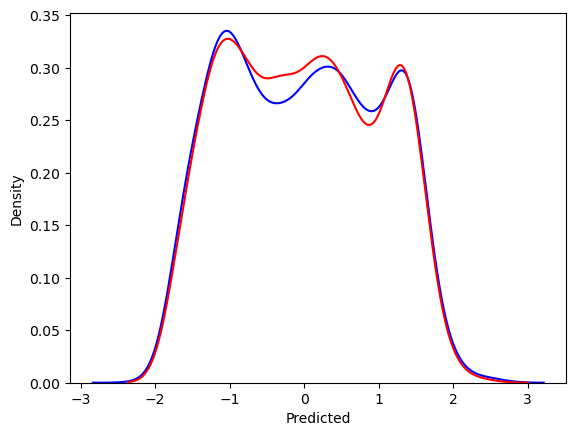

In [48]:
ax = sns.distplot(dft['Actual'], color='blue', hist=False, kde=True, kde_kws={"shade": False})
sns.distplot(dft['Predicted'], color='red', ax=ax, hist=False, kde=True, kde_kws={"shade": False})


In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))


R2 Score:  0.9278708721568406
Mean Squared Error:  0.07348801161946569
Mean Absolute Error:  0.13976464834549784
RMSE: 0.27108672342899


# Random Forest Regressor


In [50]:
from sklearn.ensemble import RandomForestRegressor
#creating random forest regressor object
rfg = RandomForestRegressor()


In [51]:
#trainig the model
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [52]:
#training accuracy
rfg.score(X_train, y_train)


0.9891346453618796

In [53]:
#predicitng salary of the employee
r_pred = rfg.predict(X_test)



# Evaluating Random Forest Regressor Model


In [54]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.646211
1,-0.745659,-0.667578
2,-0.290405,-0.334545
3,-1.048183,-1.045847
4,-0.669294,-0.631484
5,1.414598,1.498585
6,-0.820850,-0.810478
7,-1.142906,-1.112020
8,1.509320,1.528623
9,0.277930,0.308509


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predicted', ylabel='Density'>

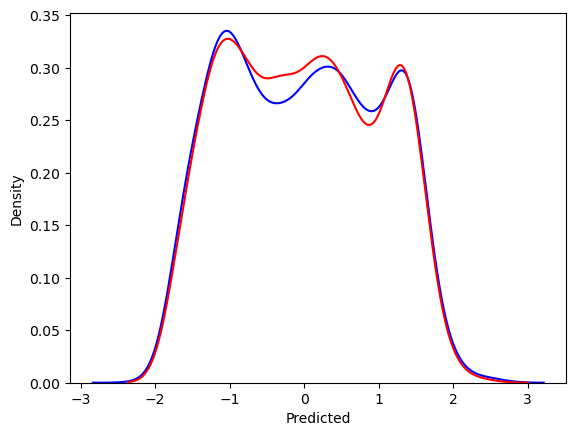

In [55]:
ax = sns.distplot(dft['Actual'], color='blue', hist=False, kde=True, kde_kws={"shade": False})
sns.distplot(dft['Predicted'], color='red', ax=ax, hist=False, kde=True, kde_kws={"shade": False})


In [56]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9411212315047215
Mean Squared Error:  0.05998802082744458
Mean Absolute Error:  0.11929343801063895
RMSE: 0.24492452067411416


# XG Boost


In [57]:
params = {
    'learning_rate': 0.1,
    'max_depth': 8}

from xgboost import XGBRegressor
model = XGBRegressor(**params)

In [58]:
# train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [59]:
y_pred = model.predict(X_test)

In [60]:
print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.9399120904727489
Mean Squared Error:  0.06121994159044604
Mean Absolute Error:  0.12961990539671184
RMSE: 0.24742663880521443


In [61]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.656819,0.580769
1,-0.745659,-0.655361
2,-0.290405,-0.307466
3,-1.048183,-1.040509
4,-0.669294,-0.638413
5,1.414598,1.488282
6,-0.820850,-0.709748
7,-1.142906,-1.125177
8,1.509320,1.544215
9,0.277930,0.298427


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predicted', ylabel='Density'>

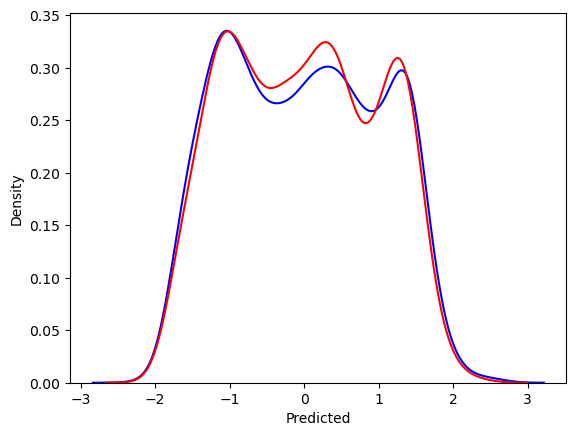

In [62]:
ax = sns.distplot(dft['Actual'], color='blue', hist=False, kde=True, kde_kws={"shade": False})
sns.distplot(dft['Predicted'], color='red', ax=ax, hist=False, kde=True, kde_kws={"shade": False})

# Conclusion
